In [1]:
import dataset as dt
import argparse 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch 
import os


from model_def import VariationalAutoEncoder_noswidth_RealNoise, train, save_model, VariationalAutoEncoder

In [2]:
#python creating_dataset.py 339 50 1300, 1400 0.1088 20000 200 300 10 75

In [3]:
x_size = 340
y_size = 171
nu_i = 1259 
nu_f = 1387
t = 0.1088
size = 2000
DM_min = 200 
DM_max = 600 
batch_size = 10 
epochs = 50
width = 0.0000005

input_dim = x_size*y_size

#cheat_sheet = pd.read_csv('CheatSheet1.csv',header =0)

 DM_obs 363.2544.  SWidth_obs 4807.9531 
tensor(15.2799) tensor(1.)


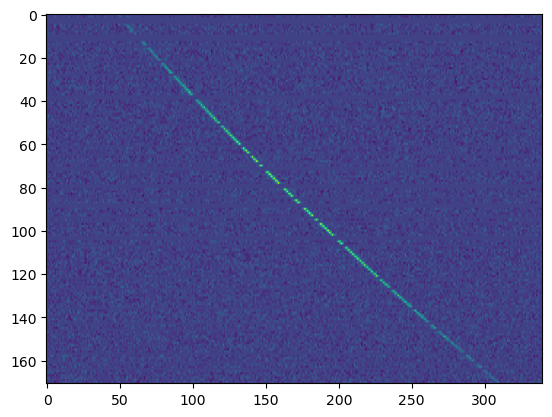

 DM_obs 320.3631.  SWidth_obs 4733.0449 
tensor(19.6340) tensor(1.)


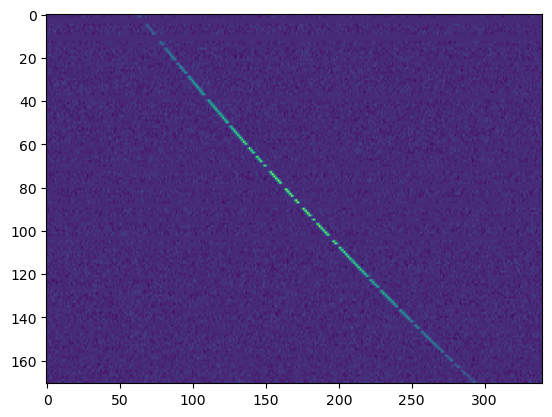

 DM_obs 294.7219.  SWidth_obs 4926.0757 
tensor(16.8939) tensor(1.)


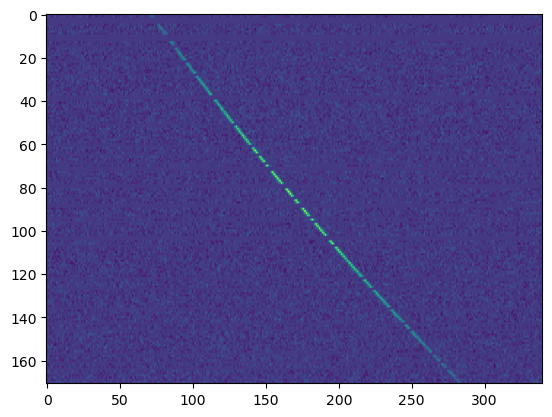

In [4]:
train_dataset, test_dataset, train_dataloader, test_dataloader, t, nu, nu0 = dt.CreateDataset(DM_min,DM_max, nu_i, nu_f, 
                                                    size, t, x_size, y_size, width, batch_size, test_flag=True)

In [5]:
import your
import matplotlib.pyplot as plt
import numpy as np
import skimage.measure

your.__version__

'0.6.7'

In [6]:
""" test_dataloader = dt.LoadDataset('/Users/ruggero/Desktop/GitModels/CombinedModels/2000_test_images.pt')
train_dataloader = dt.LoadDataset('/Users/ruggero/Desktop/GitModels/CombinedModels/2000_train_images.pt')
test_dataset = dt.LoadDataset('/Users/ruggero/Desktop/GitModels/CombinedModels/2000_test_dataset.pt')
train_dataset = dt.LoadDataset('/Users/ruggero/Desktop/GitModels/CombinedModels/2000_train_dataset.pt') """

" test_dataloader = dt.LoadDataset('/Users/ruggero/Desktop/GitModels/CombinedModels/2000_test_images.pt')\ntrain_dataloader = dt.LoadDataset('/Users/ruggero/Desktop/GitModels/CombinedModels/2000_train_images.pt')\ntest_dataset = dt.LoadDataset('/Users/ruggero/Desktop/GitModels/CombinedModels/2000_test_dataset.pt')\ntrain_dataset = dt.LoadDataset('/Users/ruggero/Desktop/GitModels/CombinedModels/2000_train_dataset.pt') "

In [7]:
nu = torch.linspace(nu_i, nu_f, y_size)
nu0 = torch.median(nu)

input_dim = x_size * y_size                               
model = VariationalAutoEncoder(input_dim, x_size, y_size, nu, nu0,t,width)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

model.to(device)

print('Created the model')




cpu
Created the model


In [8]:
lr = 1e-5

optimizer = torch.optim.Adam(model.parameters(),lr=lr)

model = train(model,epochs, train_dataloader, test_dataloader,optimizer)

print('Finished training')

Average DMs error in epoch prediction: 9.9867 
Average SWIDTH error in epoch prediction: 9.1237 
===> Epoch 1 Average loss: 0.9999
===>Test loss: 119.1602
Average DMs error in epoch prediction: 9.9190 
Average SWIDTH error in epoch prediction: 8.8121 
===> Epoch 2 Average loss: 0.9999
===>Test loss: 119.1307
Average DMs error in epoch prediction: 9.8614 
Average SWIDTH error in epoch prediction: 8.5144 
===> Epoch 3 Average loss: 0.9999
===>Test loss: 119.1089
Average DMs error in epoch prediction: 9.8040 
Average SWIDTH error in epoch prediction: 8.1144 
===> Epoch 4 Average loss: 0.9999
===>Test loss: 119.0912
Average DMs error in epoch prediction: 9.7294 
Average SWIDTH error in epoch prediction: 7.8552 
===> Epoch 5 Average loss: 0.9999
===>Test loss: 119.0771
Average DMs error in epoch prediction: 9.6567 
Average SWIDTH error in epoch prediction: 7.2999 
===> Epoch 6 Average loss: 0.9999
===>Test loss: 119.0643
Average DMs error in epoch prediction: 9.5618 
Average SWIDTH error in

KeyboardInterrupt: 

In [24]:
rand_index = rand_index = torch.randint(0,50,(10,))
super_test = []
for val in rand_index:
  super_test.append(test_dataset[val])
super_test = []
for val in rand_index:
  super_test.append(test_dataset[val])

tensor(51.6155)
DM_pred 261.4052, DM_obs 250.0105. SWidth_pred 50.5588, SWidth_obs 4262.7490 


<Figure size 2000x1000 with 0 Axes>

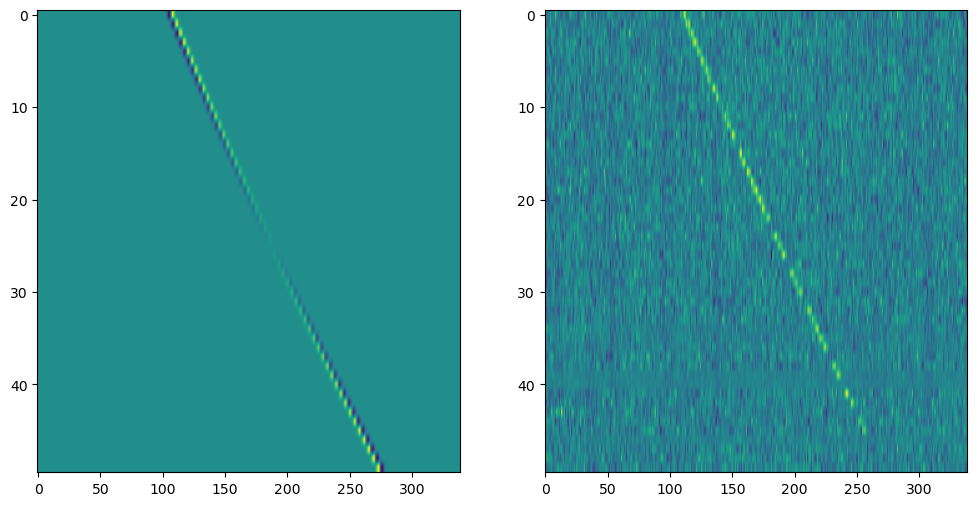

tensor(49.5813)
DM_pred 261.4052, DM_obs 200.5200. SWidth_pred 50.5588, SWidth_obs 4669.7319 


<Figure size 2000x1000 with 0 Axes>

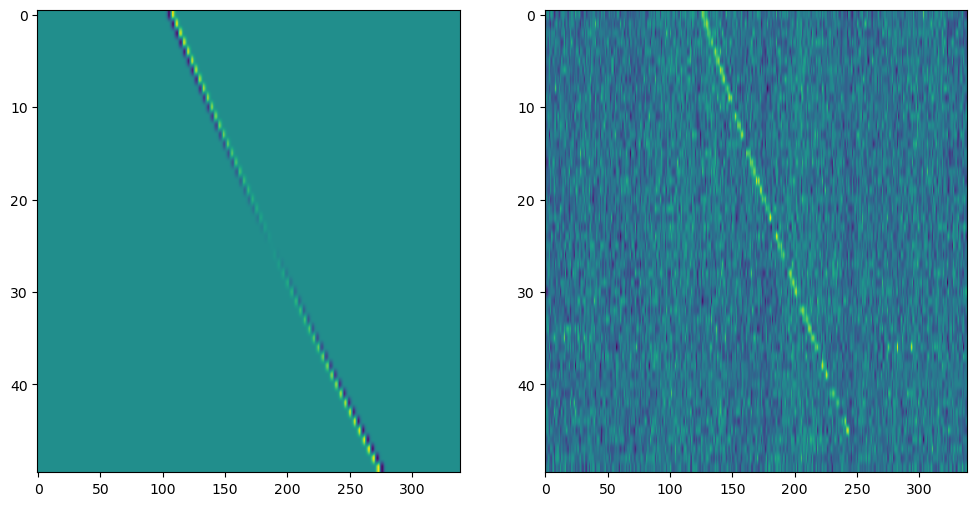

tensor(50.6285)
DM_pred 261.4052, DM_obs 229.3479. SWidth_pred 50.5588, SWidth_obs 4760.3413 


<Figure size 2000x1000 with 0 Axes>

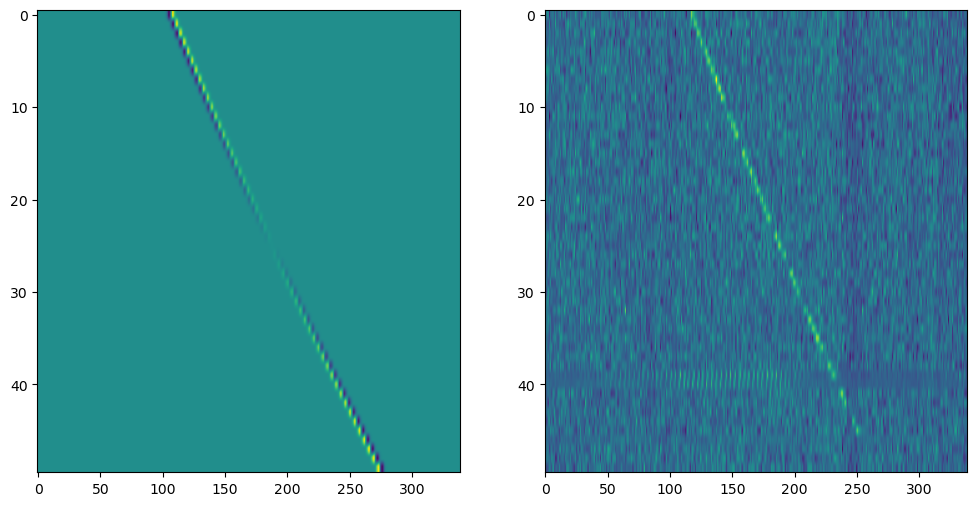

tensor(55.5355)
DM_pred 261.4052, DM_obs 282.5014. SWidth_pred 50.5588, SWidth_obs 4254.5684 


<Figure size 2000x1000 with 0 Axes>

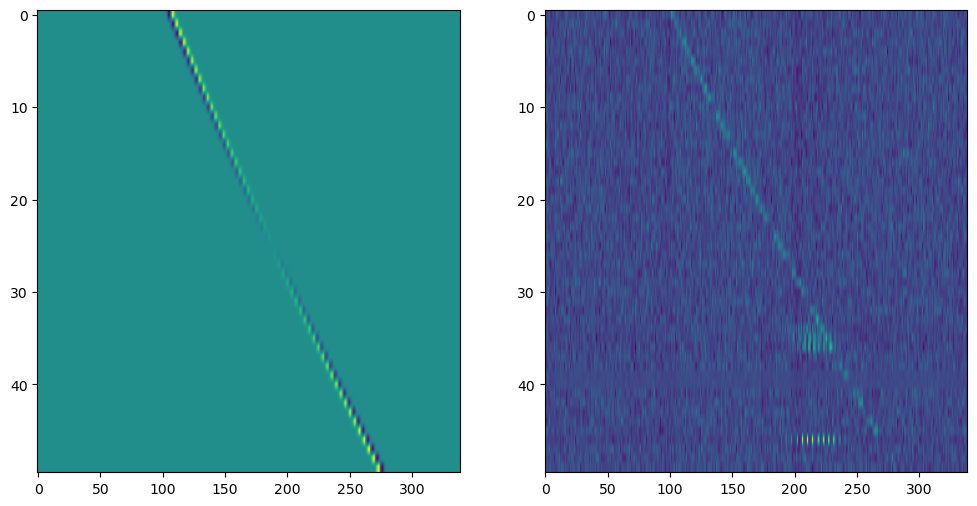

tensor(50.6798)
DM_pred 261.4052, DM_obs 216.0158. SWidth_pred 50.5588, SWidth_obs 4384.7935 


<Figure size 2000x1000 with 0 Axes>

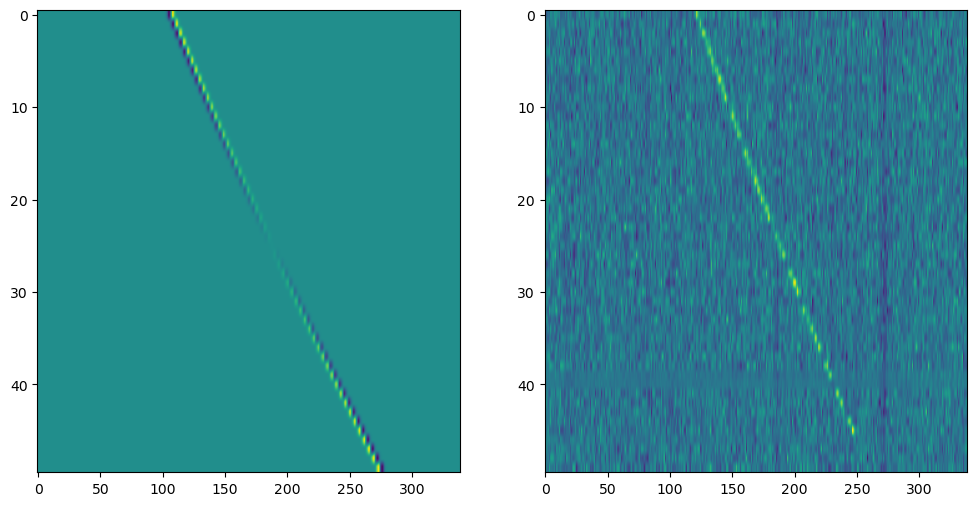

tensor(50.9207)
DM_pred 261.4052, DM_obs 203.2229. SWidth_pred 50.5588, SWidth_obs 4054.5471 


<Figure size 2000x1000 with 0 Axes>

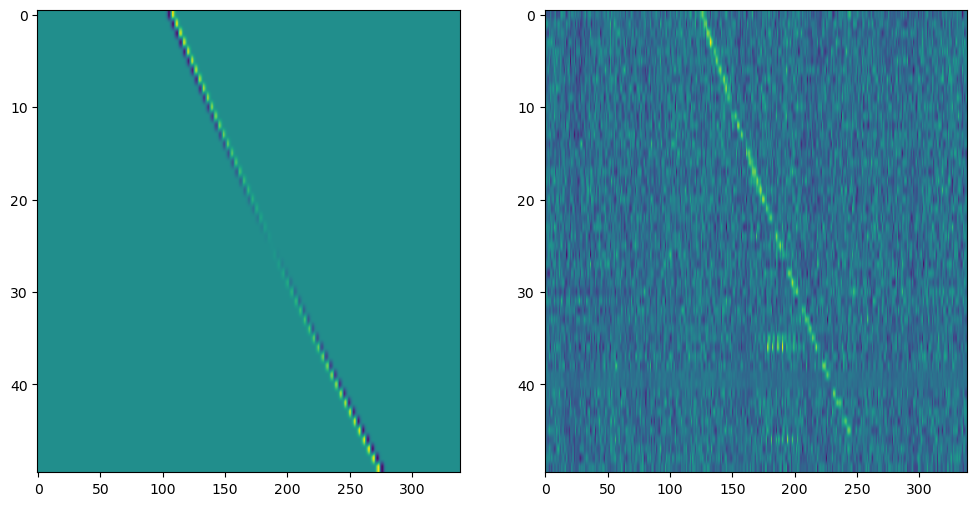

tensor(51.6155)
DM_pred 261.4052, DM_obs 250.0105. SWidth_pred 50.5588, SWidth_obs 4262.7490 


<Figure size 2000x1000 with 0 Axes>

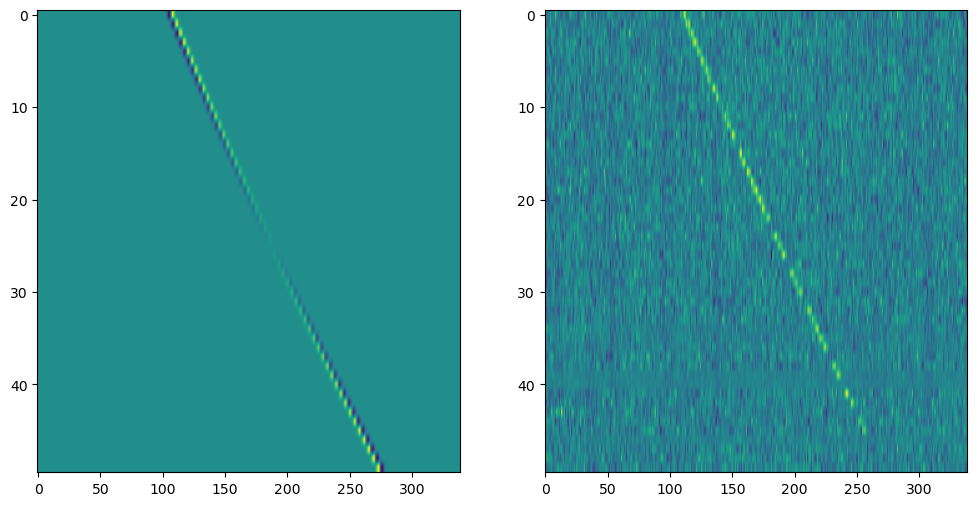

tensor(51.7973)
DM_pred 261.4052, DM_obs 228.1753. SWidth_pred 50.5588, SWidth_obs 4471.4023 


<Figure size 2000x1000 with 0 Axes>

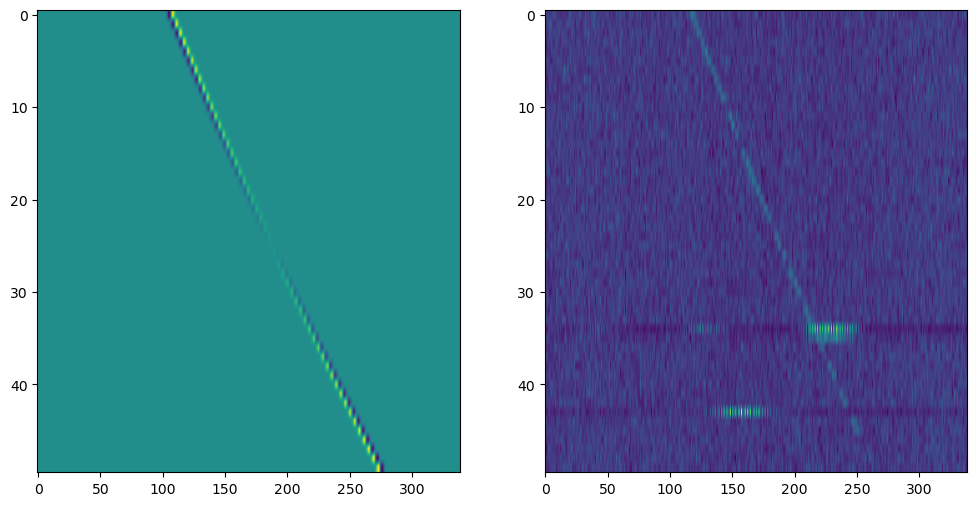

tensor(42.9596)
DM_pred 261.4052, DM_obs 270.5895. SWidth_pred 50.5588, SWidth_obs 4345.5669 


<Figure size 2000x1000 with 0 Axes>

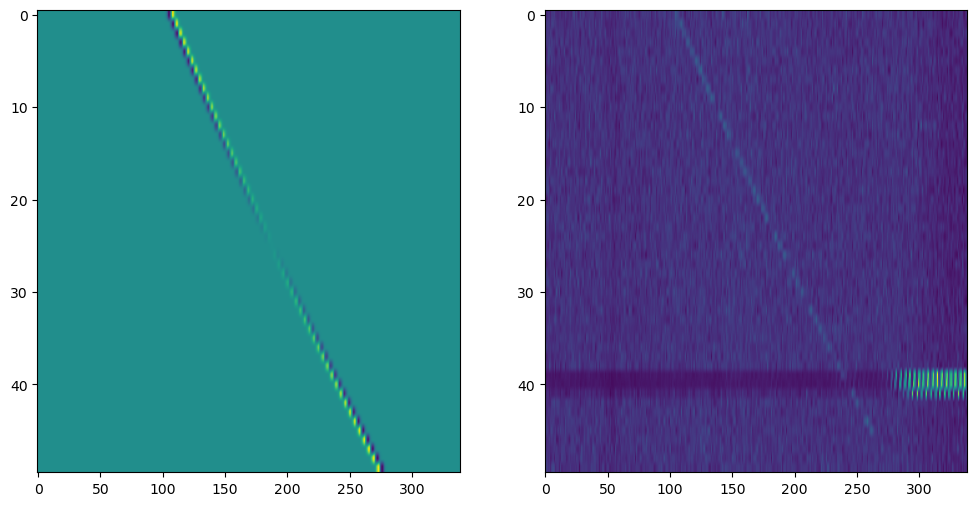

tensor(51.6401)
DM_pred 261.4052, DM_obs 255.8161. SWidth_pred 50.5588, SWidth_obs 4606.5073 


<Figure size 2000x1000 with 0 Axes>

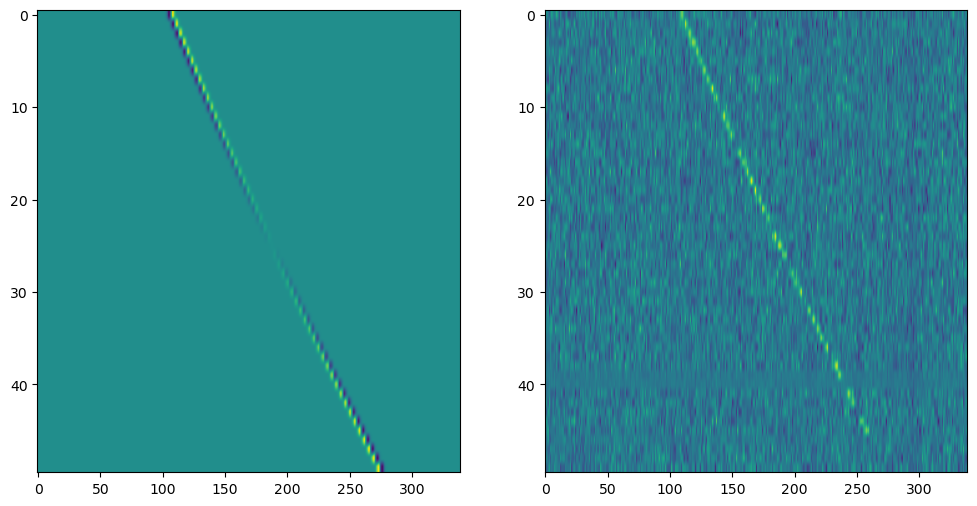

In [26]:
for val in super_test: 
  #model.eval()
  print(torch.max(val[0])/torch.std(val[0]))
  x_hat_params, x_hat_noise, params = model(val[0].view(1,x_size*50))
  #print(torch.max(x_hat_params[0]+x_hat_noise))
  fig = plt.figure(figsize=(20,10))
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,6))
  ax1.imshow((x_hat_params[0]+x_hat_noise[0]).detach().numpy(), aspect='auto')
  ax2.imshow(val[0].detach().numpy(),aspect='auto')
  print('DM_pred {:.4f}, DM_obs {:.4f}. SWidth_pred {:.4f}, SWidth_obs {:.4f} '.format(params[0].item(),val[1], params[1].item(),val[2]))
  plt.show()